#### *191024* 중간고사 끝나고 tensorflow 학습

Build a sequential model

Keras에서 제공되는 sequential model을 사용하여 fully connected-network를 구성

In [9]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential()
	# Adds a densely-connected layer with 64 units to the model:
model.add(layers.Dense(64, activation='relu'))                      # 64 channel의 출력을 하게 됨
	# Add another:
model.add(layers.Dense(64, activation='relu'))                      # 64 channel의 출력을 하게 됨
	# Add a softmax layer with 10 output units:
model.add(layers.Dense(10, activation='softmax'))                   # 10 channel의 출력을 하게 됨 -> 10종류의 class 판별

In [10]:
model.compile(optimizer=tf.optimizers.Adam(0.001),               # adam optimizer를 사용
              loss='categorical_crossentropy',                   # loss는 crossentropy
              metrics=['accuracy'])                              # accuracy => classfication 했을 때 %로 보여줌
import numpy as np
data = np.random.random((1000, 32))
labels = np.random.random((1000, 10))
model.fit(data, labels, epochs=10, batch_size=32)               # train

Train on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 1s 821us/sample - loss: 12.3901 - accuracy: 0.1130
Epoch 2/10
1000/1000 [==============================] - 0s 50us/sample - loss: 18.4154 - accuracy: 0.1180
Epoch 3/10
1000/1000 [==============================] - 0s 49us/sample - loss: 32.4528 - accuracy: 0.1090
Epoch 4/10
1000/1000 [==============================] - 0s 47us/sample - loss: 55.9973 - accuracy: 0.1060
Epoch 5/10
1000/1000 [==============================] - 0s 53us/sample - loss: 93.4789 - accuracy: 0.1070
Epoch 6/10
1000/1000 [==============================] - 0s 59us/sample - loss: 144.9985 - accuracy: 0.1090
Epoch 7/10
1000/1000 [==============================] - 0s 52us/sample - loss: 207.5572 - accuracy: 0.1070
Epoch 8/10
1000/1000 [==============================] - 0s 54us/sample - loss: 276.5487 - accuracy: 0.1000
Epoch 9/10
1000/1000 [==============================] - 0s 50us/sample - loss: 356.0843 - accuracy: 0.0950
Epoch 10/10
1000/10

# 기본 순서

1. model생성 -> 2. compile(optimizer) -> 3. fit(train)

# *optimizer의 종류*

class Adadelta: Adadelta optimizer.

class Adagrad: Adagrad optimizer.

class Adam: Adam optimizer.

class Adamax: Adamax optimizer from Adam paper's Section 7.

class Nadam: Nesterov Adam optimizer.

class Optimizer: Abstract optimizer base class.

class RMSprop: RMSProp optimizer.

class SGD: Stochastic gradient descent optimizer.

# *191028* tensorflow 기초 실습

epochs: Training is structured into epochs. An epoch is one iteration over the entire input data (this is done in smaller batches).

batch_size: When passed NumPy data, the model slices the data into smaller batches and iterates over these batches during training. This integer specifies the size of each batch. Be aware that the last batch may be smaller if the total number of samples is not divisible by the batch size.

validation_data: When prototyping a model, you want to easily monitor its performance on some validation data. Passing this argument—a tuple of inputs and labels—allows the model to display the loss and metrics in inference mode for the passed data, at the end of each epoch.

# Fashion MNIST dataset

70,000개 중의 60,000은 train, 10,000은 test data

In [59]:
import tensorflow
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [60]:
#10종류의 class
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#normalization => (0<= value <= 1)
train_images = train_images / 255.0
test_images = test_images / 255.0

#1. model 생성
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),                              # 2차원 이미지를 한 줄로 펼치게 됨 => ∵fully-connected
    tf.keras.layers.Dense(128, activation=tf.nn.relu),                          # 128개의 channel로 출력
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)                         # 마지막은 꼭 자기 class size로 내보내야함
])

#2. compile
model.compile(optimizer='adam' ,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#3. fit
model.fit(train_images, train_labels, epochs=5)                                 #batch size의 default값은 32
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 136us/sample - loss: 0.4949 - accuracy: 0.8261
Epoch 2/5
60000/60000 [==============================] - 8s 130us/sample - loss: 0.3757 - accuracy: 0.8649
Epoch 3/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.3330 - accuracy: 0.8780
Epoch 4/5
60000/60000 [==============================] - 7s 125us/sample - loss: 0.3127 - accuracy: 0.8853
Epoch 5/5
60000/60000 [==============================] - 7s 124us/sample - loss: 0.2944 - accuracy: 0.8922
10000/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy: 0.8741


In [61]:
predictions = model.predict(test_images)

(28, 28)
(1, 28, 28)
[[1.6860777e-06 8.1582584e-08 4.6339596e-07 1.0276785e-09 2.6886602e-07
  3.3030152e-02 4.5182232e-06 9.3771145e-03 4.7612803e-06 9.5758092e-01]]
9 번째 data로 예측


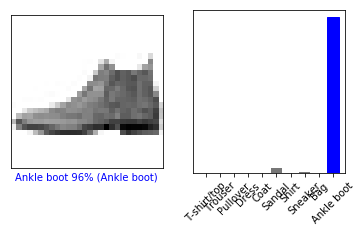

In [62]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)

print(np.argmax(predictions_single[0]),"번째 data로 예측")
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(0, predictions_single, test_labels, img)
plt.subplot(1,2,2)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [63]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

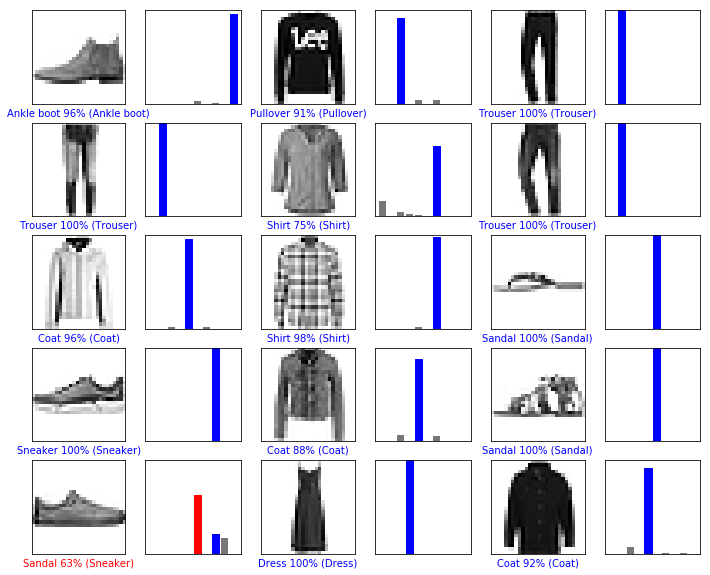

In [64]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
import matplotlib.pyplot as plt
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

# *191031* Funtioinal api // Imdb

Question : 이전에 만든 Network 앞에 CNN을 붙이려면 어떻게 하면 좋을까?

In [65]:
import tensorflow as tf
input_shape = (28, 28, 1)
x = tf.keras.Input(shape=(input_shape))
num_classes = 10
droprate = 0.5

In [66]:
# 기존의 Sequential model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Dropout(droprate))
model.add(tf.keras.layers.Conv2D(64, (5, 5), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(droprate))
model.add(tf.keras.layers.Flatten())                                                #여기부터 fully-connected network
model.add(tf.keras.layers.Dense(1000, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(droprate))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

처음에 linear모델인 경우

x = Input(shape=(input_shape,))

처음에 cnn 인 경우

x = Input(shape=(input_shape))

**funtional api에서 모델 꾸미기**

In [67]:
from tensorflow.keras import backend as K

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#normalization => (0<= value <= 1)
train_images = train_images / 255.0
test_images = test_images / 255.0

if K.image_data_format() == "channels_first":                                     #내가 받은 데이터의 format이 channel_first인지 꼭 확인
    train_images_cnn = train_images.reshape((train_images.shape[0], 1, 28, 28))   #(60000, 28, 28, 1)
    test_images_cnn = test_images.reshape((test_images.shape[0], 1, 28, 28))

# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
    train_images_cnn = train_images.reshape((train_images.shape[0], 28, 28, 1))
    test_images_cnn = test_images.reshape((test_images.shape[0], 28, 28, 1))

img_input = tf.keras.Input(shape=(input_shape))
conv1 = tf.keras.layers.Conv2D(32, 5, activation='relu')(img_input)
batch1 = tf.keras.layers.BatchNormalization()(conv1)
pooling1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(batch1)
dropout1 = tf.keras.layers.Dropout(droprate)(pooling1)
conv2 = tf.keras.layers.Conv2D(32, 5,  activation='relu')(dropout1)
batch2 = tf.keras.layers.BatchNormalization()(conv2)
pooling2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(batch2)
dropout2 = tf.keras.layers.Dropout(droprate)(pooling2)
flatten1 = tf.keras.layers.Flatten() (dropout2)
fc1 = tf.keras.layers.Dense(1000, activation='relu')(flatten1)
batch3 = tf.keras.layers.BatchNormalization()(fc1)
dropout3 = tf.keras.layers.Dropout(droprate)(batch3)
classification_output = tf.keras.layers.Dense(num_classes, activation='softmax')(dropout3)

#1. model 생성
model = tf.keras.models.Model(inputs=img_input, outputs=classification_output)

#2. compile
model.compile(optimizer='adam' ,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#3. fit
model.fit(train_images_cnn, train_labels, epochs=5)                                 #batch size의 default값은 32
test_loss, test_acc = model.evaluate(test_images_cnn, test_labels)
print('Test accuracy:', test_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 106s 2ms/sample - loss: 0.7079 - accuracy: 0.7569
Epoch 2/5
60000/60000 [==============================] - 94s 2ms/sample - loss: 0.4928 - accuracy: 0.8222
Epoch 3/5
60000/60000 [==============================] - 111s 2ms/sample - loss: 0.4437 - accuracy: 0.8412
Epoch 4/5
60000/60000 [==============================] - 122s 2ms/sample - loss: 0.4111 - accuracy: 0.8500
Epoch 5/5
60000/60000 [==============================] - 133s 2ms/sample - loss: 0.3944 - accuracy: 0.8568
10000/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy: 0.8809


# text classification

해당하는 review에서 빈도수별로 모아서 10,000개의 단어를 뽑아냄

**negative review => 0 & positive review => 1**

길이가 짧은 단어는 뒤에 padding을 붙여서 모든 단어의 길이를 동일하게 만듦

Embedding => GlobalAveragePooling1D

Embedding : discrete object로부터 mapping을 해서 real number vector로 transfer을 시킴

쉽게 말해 단어를 n-dimension vector로 만들고 싶은 것(의미가 비슷한 단어들을 모으는 작업)

Averagepooling => embegging한 각 차원의 평균을 구하여서 16개의 output을 내보냄

mapping 함수를 learning 한다

mapping 시

①단어들을 16차원의 array로 떨어뜨리는 mapping(이번 예제방식)

②10,000개의 data를 1,0으로 mapping(다음 예제의 국가(USA, EUROPE...)에서 사용된 방식

In [26]:
imdb = tf.keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
print(train_data[0])


Training entries: 25000, labels: 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [27]:
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [28]:
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)
vocab_size = 10000

#1. model 생성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 16))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [29]:
#2. compile
model.compile(optimizer='adam' ,
              loss='binary_crossentropy',
              metrics=['accuracy'])

#3. fit
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)
results = model.evaluate(test_data, test_labels)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 5s 324us/sample - loss: 0.6926 - accuracy: 0.5237 - val_loss: 0.6912 - val_accuracy: 0.5111
Epoch 2/40
15000/15000 [==============================] - 2s 119us/sample - loss: 0.6885 - accuracy: 0.6353 - val_loss: 0.6847 - val_accuracy: 0.7211
Epoch 3/40
15000/15000 [==============================] - 2s 119us/sample - loss: 0.6784 - accuracy: 0.7159 - val_loss: 0.6718 - val_accuracy: 0.7311
Epoch 4/40
15000/15000 [==============================] - 2s 120us/sample - loss: 0.6605 - accuracy: 0.7543 - val_loss: 0.6507 - val_accuracy: 0.7547
Epoch 5/40
15000/15000 [==============================] - 2s 120us/sample - loss: 0.6333 - accuracy: 0.7735 - val_loss: 0.6220 - val_accuracy: 0.7792
Epoch 6/40
15000/15000 [==============================] - 2s 118us/sample - loss: 0.5976 - accuracy: 0.7997 - val_loss: 0.5856 - val_accuracy: 0.7915
Epoch 7/40
15000/15000 [==========================

In [30]:
results = model.evaluate(test_data, test_labels)

print(results)

history_dict = history.history
print(history_dict.keys())

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3267856112670898, 0.8726]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


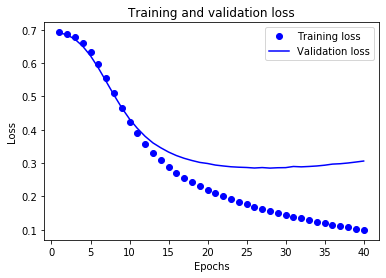

In [31]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

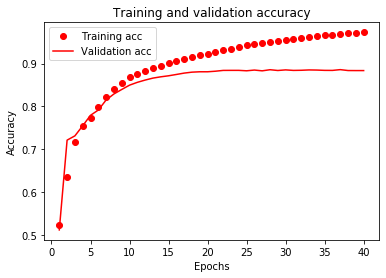

In [33]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show() 

# *191104* seaborn

dataset은 이곳에서 직접 다운이 가능해요!

☞[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

교수님 曰 소스코드는 알고 있다고 생각하고 시험을 출제하겠다

In [12]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dataset_path = tf.keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\sohn0\\.keras\\datasets\\auto-mpg.data'

In [13]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

 혹시라도 csv를 읽는 도중에 깨진 글자가 있으면 오류가

 발생할 수 있기에 읽지 않고 skip을 해야하므로 

 **skipinitialspace = True**로 설정한다

In [14]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


dataset에서 Nan 값의 갯수를 보고 싶을 때는

isna().sum()     ==   isnull().sum()

In [15]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

dataset에서 Nan 으로 설정되어 있는 값을 지우고 싶을 때는

dropna()

In [16]:
dataset = dataset.dropna()
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


pandas에서 특정 행을 날리고 싶을 때는

pop("columns")

origin이 categorization 되어 있는데 이를 숫자로 표현하고 싶어서

(ex origin==1이면 USA=1, origin==2이면 Europe=1)

다음과 같은 코드를 실행

In [17]:
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


train을 할 때 모든 데이터를 넣는 것이 아닌 일부의 데이터를 넣어야함

이 경우 80%를 train에 넣고 그 나머지를 test에 넣게 됨

In [18]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

만약 3차원 이상의 데이터라면 seaborn 패키지의 pairplot 명령을 사용한다. pairplot은 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그린다. 같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

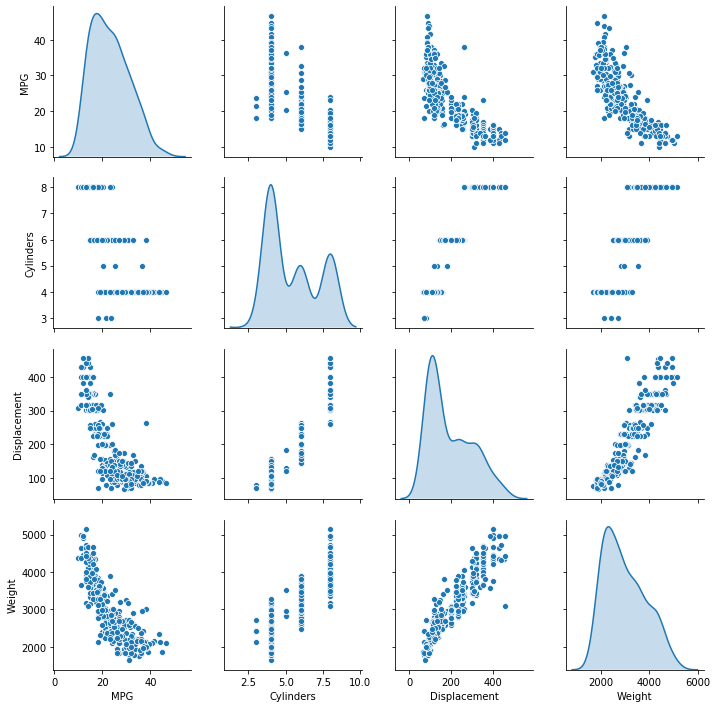

In [19]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")
plt.show()

weight/MPG를 보면 둘의 상관관계를 볼 수 있다.

weight가 2t일 때 MPG가 20~40에 있을 것이라 예측할 수 있다.

이러한 정보들의 조합으로 함수를 만들어 낼 수 있다. 이를 수학적으로 풀어내면 일반적인 regression 방식이고 우리는 ML을 이용하여 풀어낼 것 이다.

pandas의 describe를 통해 mean, std, min...을 확인 할 수 있다.

MPG를 ML을 통해 추정하고 싶기 때문에 MPG값을 pop하여 오류를 보려 한다.

In [20]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [21]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

**build_model**

Adagrad의 경우 계속해서 adaptive하게 0으로 수렴해버리기 때문에 0으로 수렴하는 정도를 조금 줄이고자 moving average를 사용하여 learning rate(α)가 0이 안 되도록 하는 것이 RMSProp이다.

G=0.9G+0.1(∇θJ(θt))2 이전 값에 0.9를 곱해주고 현재 gradient값에 0.1을 곱해줌.
이전 값* 0.9가 0이 되더라도 0.1* 현재 gradient가 있기 때문에 learning rate가 0이 되지는 않는다.

추가 설명은 ☞[optimization 방식들](http://shuuki4.github.io/deep%20learning/2016/05/20/Gradient-Descent-Algorithm-Overview.html)

In [22]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        tf.keras.layers.Dense(64, activation=tf.nn.relu),
        tf.keras.layers.Dense(1)
    ])
    optimizer = tf.compat.v1.train.RMSPropOptimizer(0.001)
    model.compile(loss='mse',
    optimizer=optimizer,
    metrics=['mae', 'mse']) # mean absolute error, mean squre error
    return model


model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


10*64 = 640

64*(64+1) = 4160

64+1 = 65

minibatch size를 10개씩 잡아서 학습시켜봄

In [23]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.12871945],
       [-0.07183355],
       [-0.11229405],
       [-0.29787388],
       [-0.23947547],
       [-0.12223049],
       [-0.28205267],
       [-0.253489  ],
       [-0.00859898],
       [-0.35238948]], dtype=float32)

training시 epoch을 1000번 정도로 설정 & 100번에 한 번씩 화면에 점을 찍음(Callback)

train 결과를 history에 저장

sequential뿐만 아니라 functional api를 사용하는 모델에서도 call을 사용할 수 있다.

In [24]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()])



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [25]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.380114,1.031579,2.380114,9.778878,2.363715,9.778878,995
996,2.215018,0.951605,2.215018,9.918983,2.317850,9.918983,996
997,2.324539,0.951950,2.324539,9.662230,2.308473,9.662230,997
998,2.231496,0.989310,2.231496,10.334597,2.420962,10.334597,998
999,2.134683,0.932297,2.134683,10.006142,2.332964,10.006143,999


***괜찮은 함수들 모음***

TreminateOnNaN() : NaN 을 만나면 training termimate

History(): History 객체에 events저장

ModelCheckpoint(): save the model after every epoch

EarlyStopping(): stop training when a monitored quantity has stopped improving

LearningRateScheduler(): Learning rate scheduler

ReduceLROnPlateau() : learning rate가 내려가야할 때 내려줌

                      learning rate scheduler와 같은 효과

Tensorboard(): tensorboard basic visualizations

In [26]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
             label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
             label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()

### early stop을 하지 않았을 경우


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

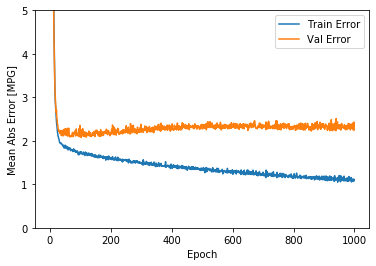

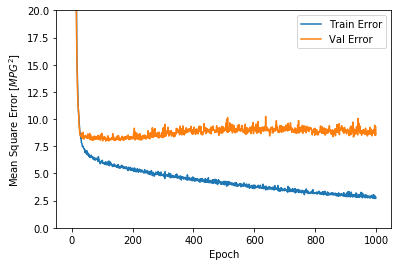

In [27]:
model = build_model()
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[PrintDot()])

plot_history(history)

### early stop을 했을 경우


...........................................................................................

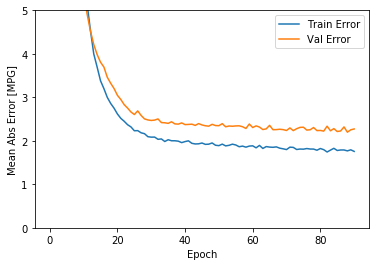

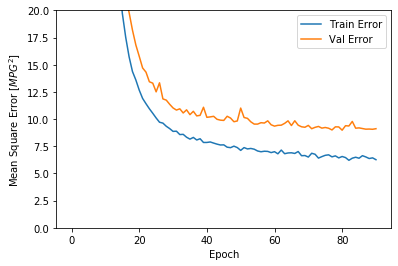

Testing set Mean Abs Error:  1.88 MPG


In [28]:
model = build_model()
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

우리 예제에 적용해본 *history losses*

[keras예제](https://keras.io/ko/callbacks/)

In [61]:
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        
model = build_model()
history = LossHistory()
model.fit(normed_train_data, train_labels,epochs=EPOCHS,  verbose=0,callbacks=[history, PrintDot()])
print(history.losses)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

이제 학습한 모델을 가지고 예측을 해보자!

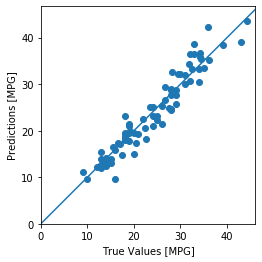

In [62]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions) 
	#A scatter plot of y vs x with varying marker size and/or color.
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal') 
	#'equal'	 Set equal scaling (i.e., make circles circular) by changing axis limits.
plt.axis('square')
	#'square‘ Square plot; similar to 'scaled', but initially forcing xmax-xmin = ymax-ymin.
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])  #  ‘_’ means -> a function result is being deliberately ignored
                                                # “_ = “ is not necessary. 

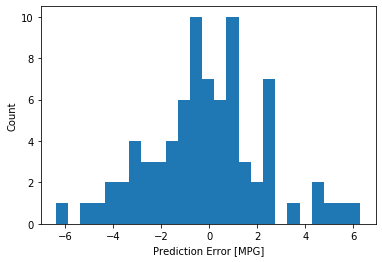

In [63]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

# *191107* Overfitting & Underfitting

## overfitting을 막는 방법
1. layer를 많이(깊게) 만든다 (20개 정도)

2. width를 넓게 만든다

**Two regularization techniques**

*weight regularization*

cost function = loss + regularization term

larger weights are penalized, which prevents overfitting

*dropout*

At every iteration, it randomly selects some nodes and removes them along with all of their incoming and outgoing connections

introduce more randomness 

______________________________________________________________________________
num_words는 이 데이터에서 등장 빈도 순위로 몇 번째에 해당하는 단어까지를

사용할 것인지 조절하는 것입니다. 예를 들어서 10,000이란 값을 넣으면, 

등장 빈도 순위가 1~10,000에 해당하는 단어만 사용하게 됩니다. 즉,

단어의 종류는 10,000개가 되므로 단어 집합의 크기는 10,000이 됩니다.

In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        if i==1:
            print(len(word_indices)," ",i," : ",word_indices,sep='\t')
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

189	 	1	 : 	[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
260	 	1	 : 	[1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 72

IMDB 리뷰 데이터는 전체 데이터에서 각 단어들이 몇 번 등장하는 지의 빈도에 따라서 인덱스를 부여했습니다

여기서 1이라는 숫자는 이 단어가 이 데이터에서 등장 빈도가 1등이라는 뜻입니다.

973라는 숫자는 이 단어가 데이터에서 973번째로 빈도수가 높은 단어라는 뜻입니다.

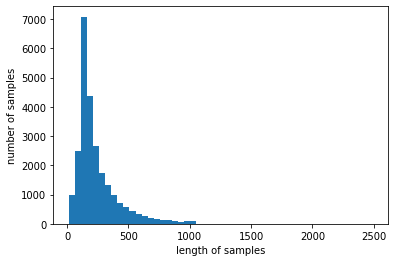

In [32]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

저장된 데이터를 히스토그램으로 그려준 것으로

100~300길이를 가진 데이터가 많은 것을 확인할 수 있습니다. 반면, 가장 긴 길이를 가진 데이터는 길이가 1,000이 넘는 것도 확인할 수 있습니다

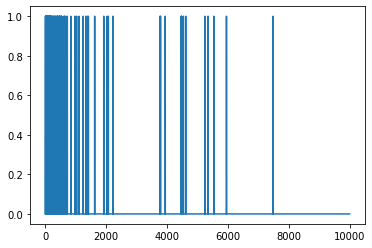

In [33]:
plt.plot(train_data[0])
plt.show()

multi_hot sequence 함수를 실행시키면 해당 train_data에 데이터가 있으면 1 없으면 0으로 변환시켜줍니다.


train_data[0][1, 14, 22, 16, 43, 530, 973...

이런식이면

train_data[0][1]=1

train_data[0][14]=1

...

train_data[0][other] = 0
              
이제 학습시키기에 앞서 본격적으로 모델을 만들어보겠습니다.
앞으로 만들 모델들과 비교하기 위해 baseline model을 아래와 같이 만들고 학습시킵니다.

In [34]:
baseline_model = tf.keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    tf.keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


10000 * 16 + 16(shifting) = 160016

16 * 16 + 16(shifting) = 272

16 * 1 + 1(shifting) = 17

In [35]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.5119 - accuracy: 0.8040 - binary_crossentropy: 0.5119 - val_loss: 0.3570 - val_accuracy: 0.8729 - val_binary_crossentropy: 0.3570
Epoch 2/20
25000/25000 - 1s - loss: 0.2625 - accuracy: 0.9076 - binary_crossentropy: 0.2625 - val_loss: 0.2840 - val_accuracy: 0.8883 - val_binary_crossentropy: 0.2840
Epoch 3/20
25000/25000 - 1s - loss: 0.1870 - accuracy: 0.9345 - binary_crossentropy: 0.1870 - val_loss: 0.2868 - val_accuracy: 0.8859 - val_binary_crossentropy: 0.2868
Epoch 4/20
25000/25000 - 1s - loss: 0.1484 - accuracy: 0.9492 - binary_crossentropy: 0.1484 - val_loss: 0.3151 - val_accuracy: 0.8787 - val_binary_crossentropy: 0.3151
Epoch 5/20
25000/25000 - 1s - loss: 0.1187 - accuracy: 0.9617 - binary_crossentropy: 0.1187 - val_loss: 0.3447 - val_accuracy: 0.8734 - val_binary_crossentropy: 0.3447
Epoch 6/20
25000/25000 - 1s - loss: 0.0965 - accuracy: 0.9702 - binary_crossentropy: 0.0965 - val_loss: 0.3812

In [36]:
smaller_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 4)                 40004     
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [37]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6046 - accuracy: 0.7545 - binary_crossentropy: 0.6046 - val_loss: 0.5102 - val_accuracy: 0.8519 - val_binary_crossentropy: 0.5102
Epoch 2/20
25000/25000 - 1s - loss: 0.4198 - accuracy: 0.8828 - binary_crossentropy: 0.4198 - val_loss: 0.3834 - val_accuracy: 0.8757 - val_binary_crossentropy: 0.3834
Epoch 3/20
25000/25000 - 1s - loss: 0.3069 - accuracy: 0.9078 - binary_crossentropy: 0.3069 - val_loss: 0.3219 - val_accuracy: 0.8845 - val_binary_crossentropy: 0.3219
Epoch 4/20
25000/25000 - 1s - loss: 0.2441 - accuracy: 0.9241 - binary_crossentropy: 0.2441 - val_loss: 0.2949 - val_accuracy: 0.8894 - val_binary_crossentropy: 0.2949
Epoch 5/20
25000/25000 - 1s - loss: 0.2064 - accuracy: 0.9350 - binary_crossentropy: 0.2064 - val_loss: 0.2856 - val_accuracy: 0.8882 - val_binary_crossentropy: 0.2856
Epoch 6/20
25000/25000 - 1s - loss: 0.1803 - accuracy: 0.9425 - binary_crossentropy: 0.1803 - val_loss: 0.2849

In [38]:
bigger_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [39]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 10s - loss: 0.3464 - accuracy: 0.8536 - binary_crossentropy: 0.3464 - val_loss: 0.2940 - val_accuracy: 0.8805 - val_binary_crossentropy: 0.2940
Epoch 2/20
25000/25000 - 8s - loss: 0.1438 - accuracy: 0.9474 - binary_crossentropy: 0.1438 - val_loss: 0.3267 - val_accuracy: 0.8744 - val_binary_crossentropy: 0.3267
Epoch 3/20
25000/25000 - 8s - loss: 0.0447 - accuracy: 0.9873 - binary_crossentropy: 0.0447 - val_loss: 0.4363 - val_accuracy: 0.8691 - val_binary_crossentropy: 0.4363
Epoch 4/20
25000/25000 - 8s - loss: 0.0057 - accuracy: 0.9992 - binary_crossentropy: 0.0057 - val_loss: 0.5951 - val_accuracy: 0.8688 - val_binary_crossentropy: 0.5951
Epoch 5/20
25000/25000 - 8s - loss: 7.2630e-04 - accuracy: 1.0000 - binary_crossentropy: 7.2630e-04 - val_loss: 0.6844 - val_accuracy: 0.8694 - val_binary_crossentropy: 0.6844
Epoch 6/20
25000/25000 - 8s - loss: 2.2700e-04 - accuracy: 1.0000 - binary_crossentropy: 2.2700e-04 -

In [40]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    x_pos = []
    y_pos = []
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
            '--', label=name.title()+' Val')
        print(type(history.history['val_'+key]))
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
        label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

<class 'list'>
<class 'list'>
<class 'list'>


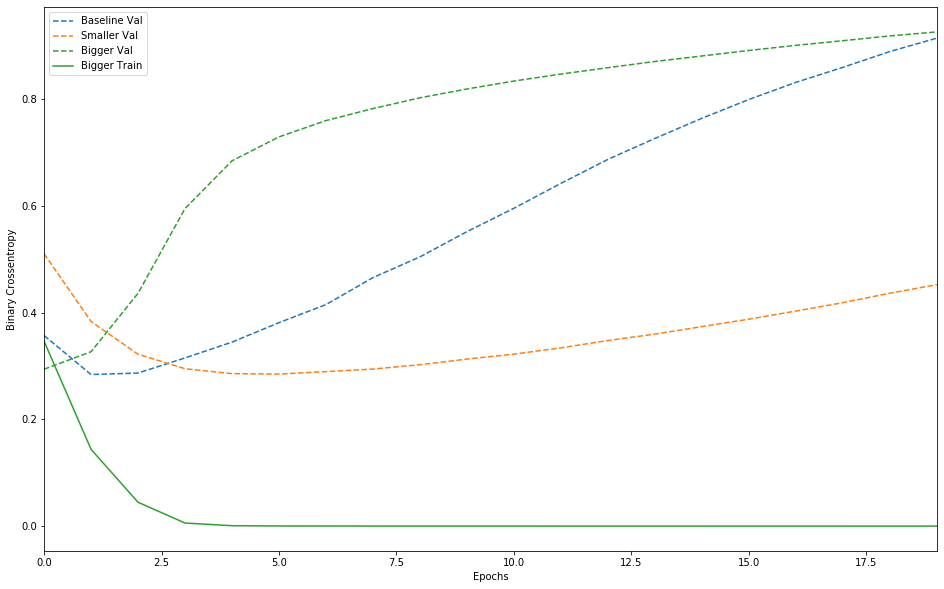

In [41]:
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

width를 바꿔가면서 성능을 비교한 그래프

이제 예전에 배웠던 **regularization** 기법을 이용하여서 overfitting을 피해보자!

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 9s - loss: 0.5174 - accuracy: 0.8138 - binary_crossentropy: 0.4773 - val_loss: 0.3778 - val_accuracy: 0.8778 - val_binary_crossentropy: 0.3358
Epoch 2/20
25000/25000 - 1s - loss: 0.3007 - accuracy: 0.9094 - binary_crossentropy: 0.2546 - val_loss: 0.3340 - val_accuracy: 0.8887 - val_binary_crossentropy: 0.2849
Epoch 3/20
25000/25000 - 2s - loss: 0.2492 - accuracy: 0.9309 - binary_crossentropy: 0.1976 - val_loss: 0.3379 - val_accuracy: 0.8865 - val_binary_crossentropy: 0.2843
Epoch 4/20
25000/25000 - 1s - loss: 0.2281 - accuracy: 0.9400 - binary_crossentropy: 0.1729 - val_loss: 0.3522 - val_accuracy: 0.8819 - val_binary_crossentropy: 0.2955
Epoch 5/20
25000/25000 - 1s - loss: 0.2102 - accuracy: 0.9486 - binary_crossentropy: 0.1524 - val_loss: 0.3655 - val_accuracy: 0.8784 - val_binary_crossentropy: 0.3070
Epoch 6/20
25000/25000 - 1s - loss: 0.1999 - accuracy: 0.9536 - binary_crossentropy: 0.1406 - val_loss: 0.3804

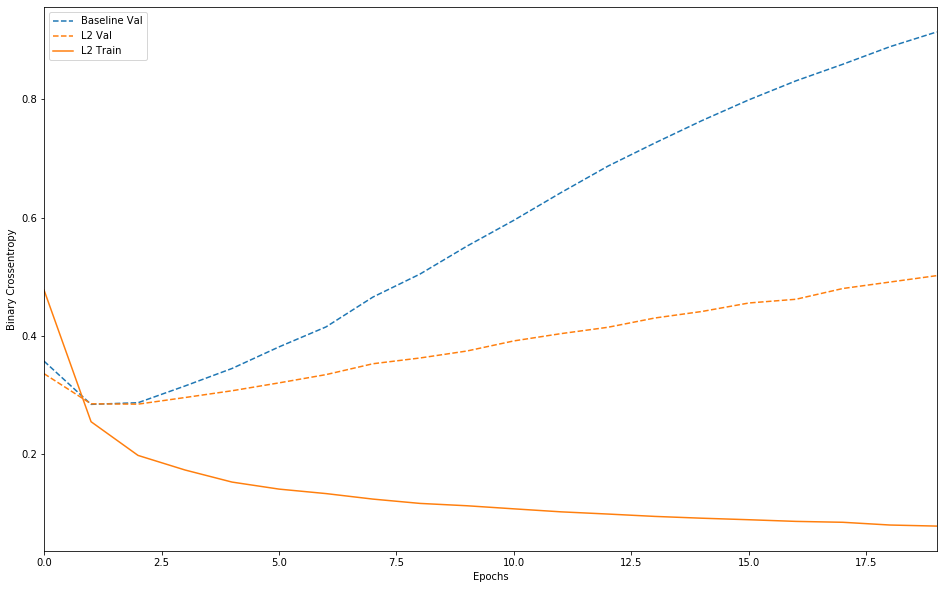

In [42]:
l2_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.001),
                       activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6302 - accuracy: 0.6364 - binary_crossentropy: 0.6302 - val_loss: 0.4906 - val_accuracy: 0.8517 - val_binary_crossentropy: 0.4906
Epoch 2/20
25000/25000 - 2s - loss: 0.4664 - accuracy: 0.7920 - binary_crossentropy: 0.4664 - val_loss: 0.3432 - val_accuracy: 0.8795 - val_binary_crossentropy: 0.3432
Epoch 3/20
25000/25000 - 2s - loss: 0.3670 - accuracy: 0.8573 - binary_crossentropy: 0.3670 - val_loss: 0.2873 - val_accuracy: 0.8874 - val_binary_crossentropy: 0.2873
Epoch 4/20
25000/25000 - 2s - loss: 0.2948 - accuracy: 0.8909 - binary_crossentropy: 0.2948 - val_loss: 0.2752 - val_accuracy: 0.8884 - val_binary_crossentropy: 0.2752
Epoch 5/20
25000/25000 - 2s - loss: 0.2513 - accuracy: 0.9093 - binary_crossentropy: 0.2513 - val_loss: 0.2823 - val_accuracy: 0.8877 - val_binary_crossentropy: 0.2823
Epoch 6/20
25000/25000 - 2s - loss: 0.2180 - accuracy: 0.9236 - binary_crossentropy: 0.2180 - val_loss: 0.2859

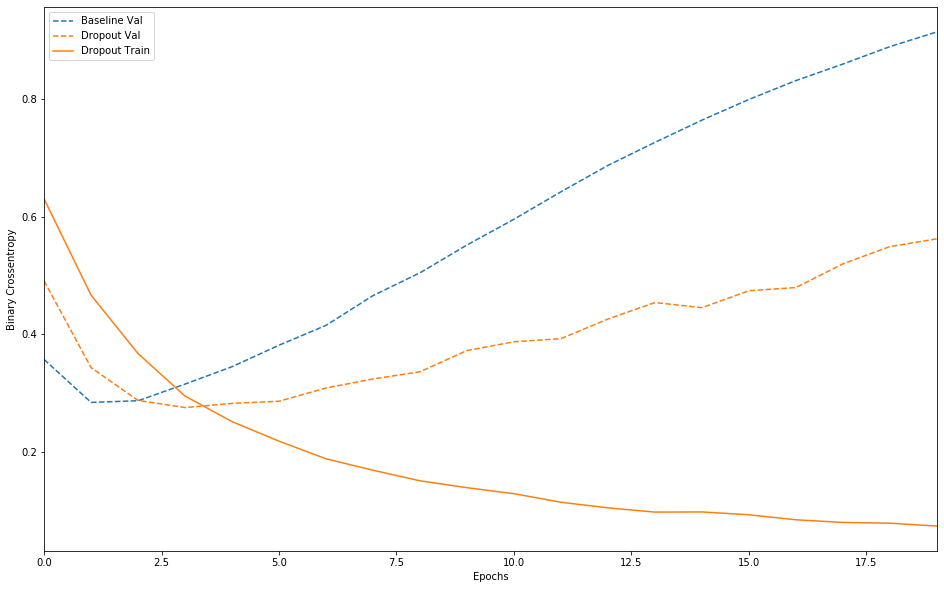

In [43]:
dpt_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 - 32s - loss: 2.5310 - accuracy: 0.7327 - binary_crossentropy: 0.5663 - val_loss: 1.7740 - val_accuracy: 0.8441 - val_binary_crossentropy: 0.3654
Epoch 2/5
25000/25000 - 25s - loss: 1.4189 - accuracy: 0.8982 - binary_crossentropy: 0.2559 - val_loss: 1.2064 - val_accuracy: 0.8893 - val_binary_crossentropy: 0.2788
Epoch 3/5
25000/25000 - 26s - loss: 1.0145 - accuracy: 0.9278 - binary_crossentropy: 0.1886 - val_loss: 1.0091 - val_accuracy: 0.8849 - val_binary_crossentropy: 0.2936
Epoch 4/5
25000/25000 - 25s - loss: 0.8103 - accuracy: 0.9424 - binary_crossentropy: 0.1572 - val_loss: 0.9131 - val_accuracy: 0.8768 - val_binary_crossentropy: 0.3335
Epoch 5/5
25000/25000 - 29s - loss: 0.6821 - accuracy: 0.9462 - binary_crossentropy: 0.1434 - val_loss: 0.8566 - val_accuracy: 0.8688 - val_binary_crossentropy: 0.3658
<class 'list'>
<class 'list'>


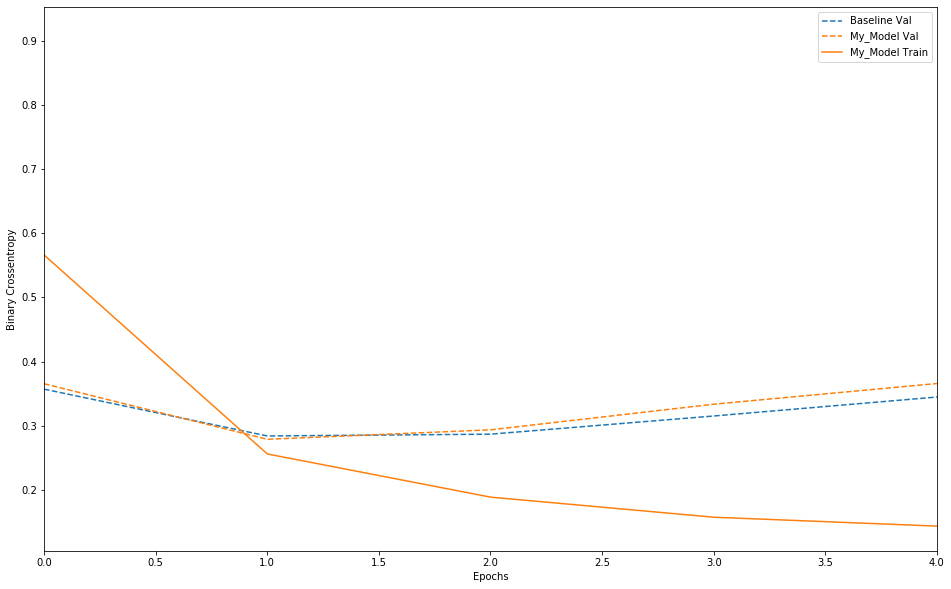

In [44]:
my_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1024, kernel_regularizer=tf.keras.regularizers.l2(0.001),
                       activation='elu', input_shape=(NUM_WORDS,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.001),
                       activation='elu'),
    tf.keras.layers.Dense(256, activation=tf.nn.elu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
my_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])
my_model_history = my_model.fit(train_data, train_labels,
                                  epochs=5,
                                  batch_size=2048,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)
plot_history([('baseline', baseline_history),
              ('my_model', my_model_history)])

# *191111* Functional api와 subclass

각 layer별로 함수로 설정
마지막에 입력과 출력을 넣어주면 model완성

**Sequential**
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
...

**Functional**
tf.keras.Input(shape=None, batch_size=None, name=None, dtype=None,
        sparse=False, tensor=None, ragged=False, **kwargs**)

img_input = tf.keras.Input(shape=(input_shape))            #이런식으로 함수형태로

conv1 = tf.keras.layers.Conv2D(32, 5, activation='relu')(img_input)

batch1 = tf.keras.layers.BatchNormalization()(conv1)

pooling1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(batch1)

dropout1 = tf.keras.layers.Dropout(droprate)(pooling1)

# 중요!
처음에 linear모델인 경우

x = Input(shape=(input_shape,))

처음에 cnn 인 경우

x = Input(shape=(input_shape))

# Sequential Model <-> Functional API

Multi-input models,
Multi-output models,
Models with shared layers (the same layer called several times),
Models with non-sequential data flows (e.g. residual connections)

쉽게 말해서 **다중 인풋과 아웃풋을 다루는 모델**은 Functional API를 사용하기 특히 적합. 함수형 API를 사용해서 복잡하게 얽힌 많은 수의 데이터 줄기를 간편하게 관리할 수 있음.

[Keras Guide](https://www.tensorflow.org/guide/keras/functional?hl=ko)

In [9]:
encoder_input = tf.keras.Input(shape=(28, 28, 1), name='original_img')
x = tf.keras.layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(3)(x)
x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
x = tf.keras.layers.Conv2D(16, 3, activation='relu')(x)
encoder_output = tf.keras.layers.GlobalMaxPooling2D()(x)

encoder = tf.keras.Model(encoder_input, encoder_output, name='encoder')
encoder.summary()

decoder_input = tf.keras.Input(shape=(16,), name='encoded_img')
x = tf.keras.layers.Reshape((4, 4, 1))(decoder_input)
x = tf.keras.layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = tf.keras.layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = tf.keras.layers.UpSampling2D(3)(x)
x = tf.keras.layers.Conv2DTranspose(16, 3, activation='relu')(x)
decoder_output = tf.keras.layers.Conv2DTranspose(1, 3, activation='relu')(x)

decoder = tf.keras.Model(decoder_input, decoder_output, name='decoder')
decoder.summary()

autoencoder_input = tf.keras.Input(shape=(28, 28, 1), name='img')
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = tf.keras.Model(autoencoder_input, decoded_img, name='autoencoder')
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_3 (Glob (None, 16)                0   

**이런 식으로 한 번 만든 모델을 다시 가져다 쓸 수 있다.!**

## sharing layers

Another good use for the functional API are models that use shared layers. Shared layers are layer instances that get reused multiple times in a same model: they learn features that correspond to multiple paths in the graph-of-layers.

Shared layers are often used to encode inputs that come from similar spaces (say, two different pieces of text that feature similar vocabulary), since they enable sharing of information across these different inputs, and they make it possible to train such a model on less data. If a given word is seen in one of the inputs, that will benefit the processing of all inputs that go through the shared layer.

To share a layer in the Functional API, just call the same layer instance multiple times. For instance, here's an Embedding layer shared across two different text inputs:

In [36]:
shared_embedding = tf.keras.layers.Embedding(1000, 128)

# Variable-length sequence of integers
text_input_a = tf.keras.Input(shape=(None,), dtype='int32')

# Variable-length sequence of integers
text_input_b = tf.keras.Input(shape=(None,), dtype='int32')

# We reuse the same layer to encode both inputs
encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)

## node example

In [38]:
a = Input(shape=(32, 32, 3))
b = Input(shape=(64, 64, 3))

conv = tf.keras.layers.Conv2D(16, (3, 3), padding='same')
conved_a = conv(a)

# Only one input so far, the following will work:
assert conv.input_shape == (None, 32, 32, 3)

conved_b = conv(b)
# now the `.input_shape` property wouldn't work, but this does:
assert conv.get_input_shape_at(0) == (None, 32, 32, 3)
assert conv.get_input_shape_at(1) == (None, 64, 64, 3)

## subclass

모델로부터 상속받아서 나의 모델을 만드는 것

1. **초기 함수(init)** : 해당하는 나의 model class가 필요한 변수나 layer가 있으면 여기서 생성!!!
2. **forward pass** : 말 그대로 연결시키는 것!                  

In [47]:
from builtins import super

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images = train_images / 255.0
test_images = test_images / 255.0
num_classes = 10
input_shape = (28, 28, 1)
droprate = 0.5
# MNIST fasion data shape (row, col,channels): gray =1 channel, color=3channels

if K.image_data_format() == "channels_first":
    train_images_cnn = train_images.reshape((train_images.shape[0], 1, 28, 28))
    test_images_cnn = test_images.reshape((test_images.shape[0], 1, 28, 28))

# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
    train_images_cnn = train_images.reshape((train_images.shape[0], 28, 28, 1))
    test_images_cnn = test_images.reshape((test_images.shape[0], 28, 28, 1))

### 1. 입력을 설정 ###
img_input = tf.keras.Input(shape=(input_shape))

### 2. 각 layer단계별로 함수 형태로 설정(functional API) ###
### 3. 출력까지 함수 형태로                              ###
class Prodigy(tf.keras.Model):
    def __init__(self, num_classes=10):                #필요한 layer를 생성
        super(Prodigy, self).__init__(name='prodigy') #부모의 생성자를 부름
        # Define your layers here.
        self.num_classes = num_classes
        self.droprate = 0.5
        self.dense_1 = tf.keras.layers.Conv2D(32, 5, activation='relu')
        self.dense_11 = tf.keras.layers.Conv2D(32, 5, activation='relu')
        self.dense_2 = tf.keras.layers.BatchNormalization()
        self.dense_22 = tf.keras.layers.BatchNormalization()
        self.dense_3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.dense_4 = tf.keras.layers.Dropout(self.droprate)
        self.dense_5 = tf.keras.layers.Flatten()
        self.dense_6 = tf.keras.layers.Dense(1000, activation='relu')
        self.dense_7 = tf.keras.layers.Dense(self.num_classes, activation='softmax')
    def call(self, inputs):                           #forward pass를 만듦
        # using layers you previously defined (in `__init__`).
        x = self.dense_1(inputs)                      #Conv2D
        x = self.dense_2(x)                           #BatchNormalization
        x = self.dense_3(x)                           #MaxPooling
        x = self.dense_4(x)                           #Dropout
        x = self.dense_11(x)                           #Conv2D
        x = self.dense_2(x)                           #BatchNormalization
        x = self.dense_3(x)                           #MaxPooling
        x = self.dense_4(x)                           #Dropout
        x = self.dense_5(x)                           #Flatten
        x = self.dense_6(x)                           #relu
        x = self.dense_22(x)                           #BatchNormalization
        x = self.dense_4(x)                           #Dropout
        return self.dense_7(x)                       #전 예제에 있던 output에 해당하는 값
    
    def compute_output_shape(self, input_shape):
        # You need to override this function if you want to use the subclassed model
        # as part of a functional-style model.
        # Otherwise, this method is optional.
        shape = tf.TensorShape(input_shape).as_list()
        shape[-1] = self.num_classes                 #list 맨 마지막에 class 갯수를 추가
        return tf.TensorShape(shape)
    
### 4. 최종적으로 model에 입력과 출력을 매개변수로 넣고 객체 생성 ###

model = tf.keras.models.Model(inputs=img_input, outputs = Prodigy(10)(img_input))

### 5. 그리고 compile fit 실행 ###
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images_cnn, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.7080 - accuracy: 0.7599
Epoch 2/5
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.4922 - accuracy: 0.8209
Epoch 3/5
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.4450 - accuracy: 0.8404
Epoch 4/5
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.4174 - accuracy: 0.8481
Epoch 5/5
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.3983 - accuracy: 0.8564


# *191114* tensorflow 정리 및 pytorch 시작

weight의 저장방법

In [58]:
import tensorflow as tf
import numpy as np
data = np.random.random((1000, 32))
labels = np.random.random((1000, 10))
model = tf.keras.Sequential()
	# Adds a densely-connected layer with 64 units to the model:
model.add(tf.keras.layers.Dense(64, activation='relu'))                      # 64 channel의 출력을 하게 됨
	# Add another:
model.add(tf.keras.layers.Dense(64, activation='relu'))                      # 64 channel의 출력을 하게 됨
	# Add a softmax layer with 10 output units:
model.add(tf.keras.layers.Dense(10, activation='softmax'))                   # 10 channel의 출력을 하게 됨 -> 10종류의 class 판별
model.compile(optimizer=tf.optimizers.Adam(0.001),               # adam optimizer를 사용
              loss='categorical_crossentropy',                   # loss는 crossentropy
              metrics=['accuracy'])                              # accuracy => classfica
model.fit(data, labels, epochs=10, batch_size=32)               # train

# Save entire model to a HDF5 file
model.save('my_model.h5')

# Recreate the exact same model, including weights and optimizer.
model = tf.keras.models.load_model('my_model.h5')

# Save weights to a json file
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
    
# Save weights to a HDF5 file
model.save_weights('my_model_weights.h5')

# Restore the model's state
model.load_weights('my_model_weights.h5')

Train on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 1s 1ms/sample - loss: 11.7588 - accuracy: 0.0950
Epoch 2/10
1000/1000 [==============================] - 0s 75us/sample - loss: 16.4039 - accuracy: 0.0970
Epoch 3/10
1000/1000 [==============================] - 0s 72us/sample - loss: 32.2744 - accuracy: 0.0850
Epoch 4/10
1000/1000 [==============================] - 0s 91us/sample - loss: 56.2097 - accuracy: 0.0890
Epoch 5/10
1000/1000 [==============================] - 0s 80us/sample - loss: 80.9305 - accuracy: 0.0790
Epoch 6/10
1000/1000 [==============================] - 0s 82us/sample - loss: 105.4809 - accuracy: 0.0840
Epoch 7/10
1000/1000 [==============================] - 0s 76us/sample - loss: 126.4893 - accuracy: 0.1040
Epoch 8/10
1000/1000 [==============================] - 0s 75us/sample - loss: 142.8527 - accuracy: 0.0930
Epoch 9/10
1000/1000 [==============================] - 0s 72us/sample - loss: 154.7469 - accuracy: 0.0860
Epoch 10/10
1000/1000

In [59]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import platform
# import matplotlib
# #matplotlib.use('TKAgg')
import matplotlib.pyplot as plt
import numpy as np

In [60]:
def imshow(img):
    npimg = img.numpy()  # convert the tensor to numpy for displaying the image
    # for displaying the image, shape of the image should be height * width * channels
    # plt.switch_backend('TKAgg')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

**2D Convolution**

torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')

In [61]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5) #in, out, filtersize
        self.pool = nn.MaxPool2d(2, 2) #2x2 pooling
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.fc1 = nn.Linear(64 * 4 * 4, 1000)
        self.fc2 = nn.Linear(1000, 10)
    def  forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64  *  4  *  4)                           #flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

nn.Module을 상속 받을 경우 forward()함수를 구현해야만 함!

forward함수는 model을 호출함과 동시에 자동으로 실행됨

model, train_loader, optimizer를 결정하고 시작!

**tensorflow와 비교하면서 보기**

# train 함수의 순서 외울것!!

In [63]:
def train(log_interval, model, device, train_loader, optimizer, epoch):
    model.train()
    running_loss =0.0
    criterion = nn.CrossEntropyLoss() #defalut is mean of mini-batchsamples
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()                                                                   #항상 해야하는 것
        output = model(data)                                                                    #항상 해야하는 것
        loss = criterion(output, target)                                                        #항상 해야하는 것
        loss.backward()                                                                         #항상 해야하는 것
        optimizer.step()                                                                        #항상 해야하는 것
        running_loss += loss.item()                                                             #하나의 batch에 대한 loss를 구한 것 => loss_item
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), running_loss/log_interval))
            running_loss =0.0

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    criterion =  nn.CrossEntropyLoss(reduction='sum') #add all samples in a mini-batch                  sum이 필요한 이유는?
    with torch.no_grad():                                                           #sum <-> mean    batch 4개를 더해서 결과를 갖는게 sum
        for data, target in test_loader:                                            #sum <-> mean    default는 mean & 배치별로 평균을 주게 됨
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            test_loss +=  loss.item()
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [65]:
def main():
    epochs = 5
    learning_rate = 0.001
    batch_size = 32
    test_batch_size=1000
    log_interval =100
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    nThreads = 1 if use_cuda else 2 
    if platform.system() == 'Windows':
        nThreads =0 #if you use windows
    transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))])
    # datasets
    trainset = torchvision.datasets.FashionMNIST('./data',
        download=True,
        train=True,
        transform=transform)
    testset = torchvision.datasets.FashionMNIST('./data',
        download=True,
        train=False,
        transform=transform)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=nThreads)

    test_loader = torch.utils.data.DataLoader(testset, batch_size=test_batch_size, shuffle=False, num_workers=nThreads)

    # constant for classes
    classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

    model = Net().to(device)

    # optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for  epoch  in  range(1,  epochs + 1):
            train(log_interval, model, device, train_loader, optimizer, epoch)
            test(model, device, test_loader)
            
if __name__ == "__main__":
    main()

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.022970
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.560608
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.180899
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.133064
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.092479
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.092171
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.079137
Train Epoch: 1 [22400/60000 (37%)]	Loss: 0.091587
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.084310
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.071760
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.076978
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.076749
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.055170
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.055197
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.071965
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.046625
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.054361
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.068974
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.050810

Test set: Average loss: 0.0351, Accuracy: 9893/10000 (99%)

# *191118* Caltech101

In [1]:
# pytorch basic classification 
# Fashion mnist data set
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import models
import platform
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# build a network model, 
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 5) #in, out, filtersize
        self.pool = nn.MaxPool2d(2, 2) #2x2 pooling
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.fc1 = nn.Linear(64 * 53 * 53, 1000)
        self.fc2 = nn.Linear(1000, 101)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 53 * 53)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [3]:
def train(log_interval, model, device, train_loader, optimizer, epoch):
    model.train()
    running_loss =0.0
    criterion = nn.NLLLoss() #defalut is mean of mini-batchsamples
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), running_loss/log_interval))
            running_loss =0.0
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    criterion = nn.NLLLoss(reduction='sum') #add all samples in a mini-batch
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            test_loss +=  loss.item()
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [4]:
# Image transformations
image_transforms = {
    # Train uses data augmentation
    'Augment':
    transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),  # Image net standards
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])  # Imagenet standards
    ]),
    # Validation does not use augmentation
    'noAugment':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# *191203* ResNets

[강의 pdf☞](https://arxiv.org/pdf/1512.03385.pdf)

[ResNext☞](https://arxiv.org/abs/1611.05431)

입출력이 같은 dimension이면 실선 표시

dimension이 커지면 점선표시

zero padding으로 채워넣던지

linear projection으로 맞춰주던지

이 두가지 모두에서 stride는 2로

no dropout

no hidden fc

In [ ]:
transform_caltech101=transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

from torchvision import datasets
from torch.utils.data import DataLoader

 traindir = 'C:\\Users\\Dongsung\\Desktop\\data\\101_ObjectCategories'
 init_dataset = torchvision.datasets.ImageFolder(root=traindir, transform=transform_caltech101)
   
    total_length = len(init_dataset)
    train_length = int(total_length*0.8)
    test_length = total_length-train_length
    lengths = [train_length,test_length]
    trainset, testset =  torch.utils.data.dataset.random_split(init_dataset, lengths)
# Dataloader iterators, make sure to shuffle
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=nThreads)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=test_batch_size, shuffle=False, num_workers=nThreads)
